# Logistic Regression: Exam Admission Classification
Classifies student admission (0/1) from two exam scores using logistic regression implemented from scratch. Includes: data loading, visualization, sigmoid, unregularized cost and gradient, gradient descent training, decision boundary plot, prediction function, and training accuracy.

Data shapes X, y: (100, 2) (100,)
First 5 X rows:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
First 5 y: [0. 0. 0. 1. 1.]


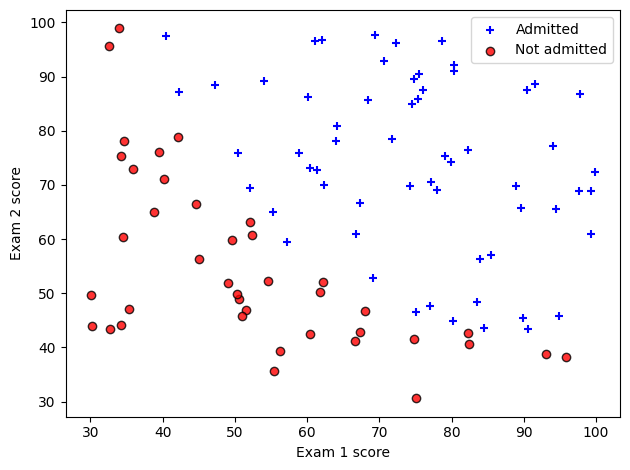

sigmoid(0) = 0.5
sigmoid([-1,0,1,2]) = [0.26894142 0.5        0.73105858 0.88079708]
Cost at initial w (zeros): 0.693
Cost at test w,b: 0.218
Gradient at zeros (dj_db): -0.1
Gradient at zeros (dj_dw): [-12.00921658929115, -11.262842205513591]
Gradient test dj_db: -0.5999999999991071
Gradient test dj_dw: [-44.831353617873795, -44.37384124953978]
Iteration      0: Cost 0.9638
Iteration  10000: Cost 0.3019
Iteration  20000: Cost 0.2985
Iteration  30000: Cost 0.2953
Iteration  40000: Cost 0.2924
Iteration  50000: Cost 0.2895
Iteration  60000: Cost 0.2869
Iteration  70000: Cost 0.2844
Iteration  80000: Cost 0.2820
Iteration  90000: Cost 0.2797
Iteration  99999: Cost 0.2776


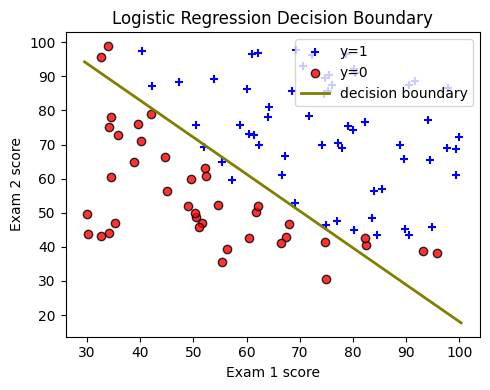

Predict test output: [0 1 1 1]
Train Accuracy: 91.00%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --------------------------------------------------
# Load data
# --------------------------------------------------
def load_data(path):
    """
    Reads comma-separated file: feature columns then label column.
    """
    data = np.loadtxt(path, delimiter=",")
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

X_train, y_train = load_data("ex1data2.txt")
print("Data shapes X, y:", X_train.shape, y_train.shape)
print("First 5 X rows:\n", X_train[:5])
print("First 5 y:", y_train[:5])

# --------------------------------------------------
# Plot data
# --------------------------------------------------
def plot_data(X, y, pos_label="Admitted", neg_label="Not admitted"):
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='+', label=pos_label)
    plt.scatter(X[neg, 0], X[neg, 1], c='r', marker='o', edgecolor='k', label=neg_label, alpha=0.8)

plt.figure()
plot_data(X_train, y_train)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Sigmoid
# --------------------------------------------------
def sigmoid(z):
    """
    Compute the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

# Quick tests
print("sigmoid(0) =", sigmoid(0))
print("sigmoid([-1,0,1,2]) =", sigmoid(np.array([-1,0,1,2])))

# --------------------------------------------------
# Cost (unregularized)
# --------------------------------------------------
def compute_cost(X, y, w, b, lambda_=None):
    """
    Logistic regression cost
    """
    m, n = X.shape
    cost = 0.0
    for i in range(m):
        z = np.dot(X[i], w) + b
        f = sigmoid(z)
        cost += -y[i]*np.log(f) - (1 - y[i])*np.log(1 - f)
    return cost / m

m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.0
print("Cost at initial w (zeros): {:.3f}".format(compute_cost(X_train, y_train, initial_w, initial_b)))

test_w = np.array([0.2, 0.2])
test_b = -24
print("Cost at test w,b: {:.3f}".format(compute_cost(X_train, y_train, test_w, test_b)))

# --------------------------------------------------
# Gradient (unregularized)
# --------------------------------------------------
def compute_gradient(X, y, w, b, lambda_=None):
    """
    Logistic regression gradient
    """
    m, n = X.shape
    dj_dw = np.zeros_like(w)
    dj_db = 0.0
    for i in range(m):
        f = sigmoid(np.dot(X[i], w) + b)
        err = f - y[i]
        dj_dw += err * X[i]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

dj_db0, dj_dw0 = compute_gradient(X_train, y_train, initial_w, initial_b)
print("Gradient at zeros (dj_db):", dj_db0)
print("Gradient at zeros (dj_dw):", dj_dw0.tolist())

test_w2 = np.array([0.2, -0.5])
test_b2 = -24
dj_db_t, dj_dw_t = compute_gradient(X_train, y_train, test_w2, test_b2)
print("Gradient test dj_db:", dj_db_t)
print("Gradient test dj_dw:", dj_dw_t.tolist())

# --------------------------------------------------
# Gradient Descent
# --------------------------------------------------
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function,
                     alpha, num_iters, lambda_):
    J_history = []
    w_history = []
    w = w_in.copy()
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 100000:
            J_history.append(cost_function(X, y, w, b, lambda_))
        if i % math.ceil(num_iters/10) == 0 or i == num_iters - 1:
            w_history.append(w.copy())
            print(f"Iteration {i:6d}: Cost {J_history[-1]:.4f}")
    return w, b, J_history, w_history

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(n) - 0.5)
initial_b = -8.0
iterations = 100000
alpha = 0.001

w, b, J_history, _ = gradient_descent(
    X_train, y_train,
    initial_w, initial_b,
    compute_cost, compute_gradient,
    alpha, iterations, 0.0
)

# --------------------------------------------------
# Plot decision boundary
# --------------------------------------------------
def plot_decision_boundary(w, b, X, y):
    """
    Plot linear decision boundary for 2D logistic regression
    """
    w = w.reshape(-1)
    if X.shape[1] != 2:
        raise ValueError("plot_decision_boundary expects X with 2 features.")
    plt.figure(figsize=(5,4))
    pos = y == 1
    neg = y == 0
    if np.any(pos):
        plt.scatter(X[pos,0], X[pos,1], c='b', marker='+', label='y=1')
    if np.any(neg):
        plt.scatter(X[neg,0], X[neg,1], c='r', marker='o', edgecolor='k', alpha=0.8, label='y=0')
    if abs(w[1]) > 1e-12:
        x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
        x_vals = np.linspace(x_min, x_max, 250)
        y_vals = -(w[0]*x_vals + b)/w[1]
        plt.plot(x_vals, y_vals, color='olive', linewidth=2, label="decision boundary")
    else:
        plt.axvline(-b / w[0], color='olive', linewidth=2, label="decision boundary")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.title("Logistic Regression Decision Boundary")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

plot_decision_boundary(w, b, X_train, y_train)

# --------------------------------------------------
# Predict
# --------------------------------------------------
def predict(X, w, b):
    z = X @ w + b
    probs = sigmoid(z)
    return (probs >= 0.5).astype(int)

# Test predict with random
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4,2) - 0.5
tmp_p = predict(tmp_X, tmp_w, tmp_b)
print("Predict test output:", tmp_p)

# Training accuracy
p_train = predict(X_train, w, b)
print("Train Accuracy: {:.2f}%".format(np.mean(p_train == y_train) * 100.0))

## Summary
Trained a 2-feature logistic regression model with manual cost and gradient; achieved printed training accuracy and visualized decision boundary.  